In [89]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt


In [77]:
data=pd.read_csv("/Users/padmanabhjagdishwanikar/Downloads/GreenAI/green_tech_data.csv")

In [78]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


sustainability
0    85
1    15
Name: count, dtype: int64


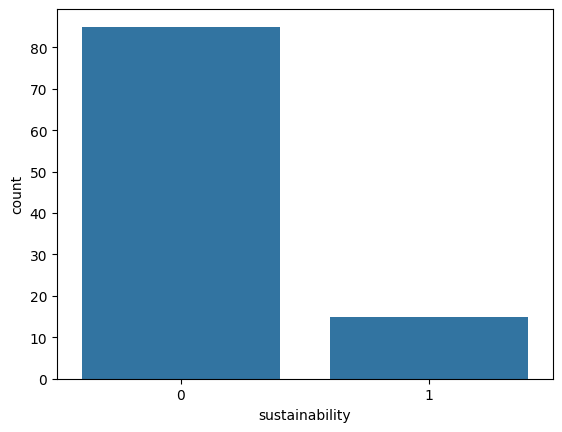

In [79]:
#check if data is balanced or not 
print(data['sustainability'].value_counts()) 
# Visualize class distribution
sns.countplot(x='sustainability', data=data) 
plt.show()

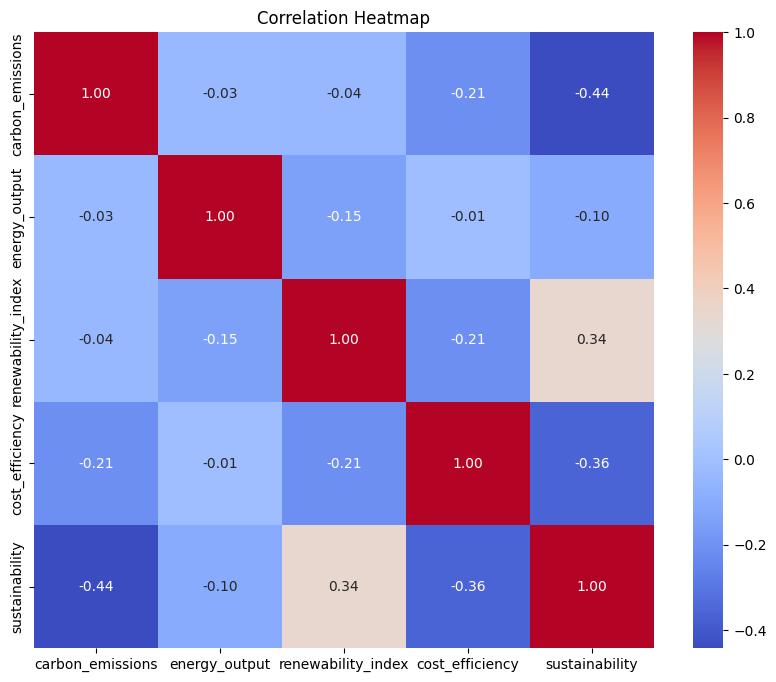

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [81]:
X=data[['carbon_emissions','renewability_index','cost_efficiency']]
y=data['sustainability']

In [82]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.4,random_state=42)

In [83]:
X_train.head()

,carbon_emissions,renewability_index,cost_efficiency
83,72.245423,0.093982,4.448624
53,363.189573,0.316922,1.233205
70,320.285669,0.809361,0.953501
45,281.882800,0.928319,3.271325
44,140.572994,0.015457,2.293271


In [84]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [85]:
print("Slope: ",model.coef_)
print("y-intercept: ",model.intercept_)

Slope:  [[-0.04657297  0.7608105  -1.511276  ]]
y-intercept:  [8.74913272]


In [86]:
y_pred = model.predict(X_test)


In [87]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 90.00%


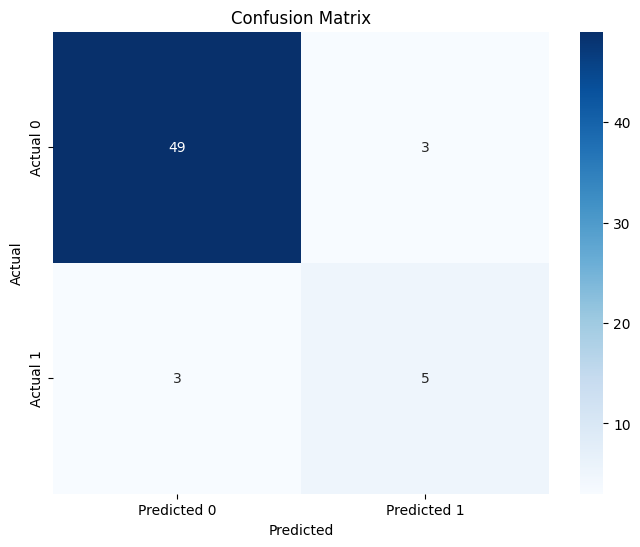

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [97]:
print(classification_report(y_test,y_pred,target_names=['Not Sustainable','Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      0.94      0.94        52
    Sustainable       0.62      0.62      0.62         8

       accuracy                           0.90        60
      macro avg       0.78      0.78      0.78        60
   weighted avg       0.90      0.90      0.90        60



In [100]:
coefficients=pd.DataFrame(model.coef_.T,index=X.columns,columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.046573
renewability_index     0.760811
cost_efficiency       -1.511276


In [103]:
import joblib 
joblib.dump(model,'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [106]:
)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but LinearRegression is expecting 1 features as input.